# Q1

In [30]:
import numpy as np

m = 5000
n = 500
probabilities = np.arange(0.0, 1.01, 0.01)

samplesPerProb = np.zeros((len(probabilities), m))
expectationPerProb = np.zeros((2,len(probabilities)))
variancePerProb = np.zeros((2,len(probabilities)))

def bernoliSampleGenrator(prob):
  bernoliGenerated = np.random.choice([0, 1], size=(m * n), p=[1 - prob, prob])
  bernoliOrganized = np.reshape(np.array(bernoliGenerated), (m, n))
  BinominalSamples = np.sum(bernoliOrganized, axis=1)
  return BinominalSamples

for i, prob in enumerate(probabilities):
    samplesPerProb[i, :] = bernoliSampleGenrator(prob)
    expectationPerProb[0,i] = n*prob
    variancePerProb[0,i] = n*prob*(1-prob)

expectationPerProb[1,:] = np.sum(samplesPerProb, axis=1)/m
sampExDiffPerProb = samplesPerProb-(np.reshape(expectationPerProb[1,:], (len(probabilities), 1)))
sampExDiff2PerProb = (sampExDiffPerProb * sampExDiffPerProb)
variancePerProb[1,:] = np.sum(sampExDiff2PerProb, axis=1)/m

In [33]:
print(expectationPerProb[0])
print(expectationPerProb[1])
print("----------")
print(variancePerProb[0])
print(variancePerProb[1])

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200. 205.
 210. 215. 220. 225. 230. 235. 240. 245. 250. 255. 260. 265. 270. 275.
 280. 285. 290. 295. 300. 305. 310. 315. 320. 325. 330. 335. 340. 345.
 350. 355. 360. 365. 370. 375. 380. 385. 390. 395. 400. 405. 410. 415.
 420. 425. 430. 435. 440. 445. 450. 455. 460. 465. 470. 475. 480. 485.
 490. 495. 500.]
[  0.       4.9908   9.9974  15.0306  20.042   24.9556  30.0858  35.012
  39.9702  44.942   50.0974  54.864   60.0668  64.6832  70.1044  75.12
  79.8444  85.1586  90.1128  94.888   99.9784 105.0576 109.9486 114.9106
 119.8532 125.0348 130.2874 135.1244 140.2626 145.0304 149.8446 154.902
 160.104  165.0096 170.0392 175.02   180.2086 184.8508 189.7886 194.8226
 199.8434 204.7806 210.0622 215.0694 220.2586 225.2208 229.922  234.966
 239.8922 245.103  250.249  254.9028 260.1558 265.159

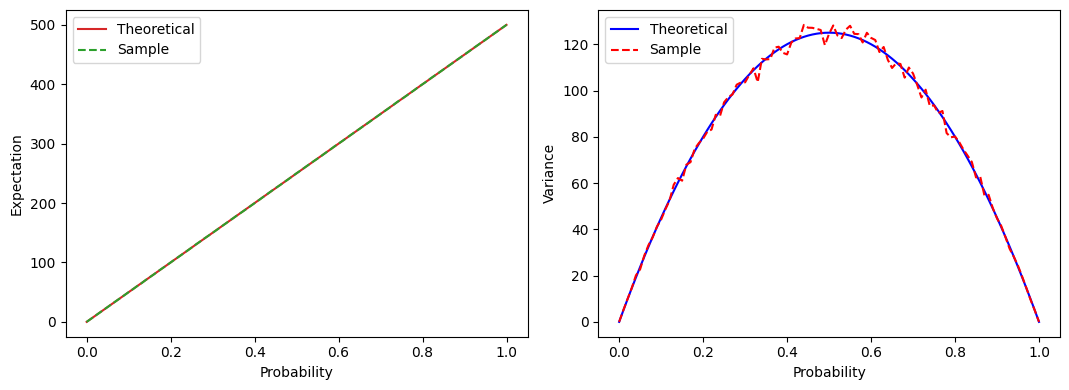

In [34]:
import matplotlib.pyplot as plt
fig, (p1, p2) = plt.subplots(1, 2, figsize=(10.8, 4))

p1.set_xlabel('Probability')
p1.set_ylabel('Expectation')
p1.plot(probabilities, expectationPerProb[0], color='tab:red', label='Theoretical')
p1.plot(probabilities, expectationPerProb[1], linestyle='dashed', color='tab:green', label='Sample')
p1.legend(loc='upper left')

p2.set_xlabel('Probability')
p2.set_ylabel('Variance')
p2.plot(probabilities, variancePerProb[0], color='blue', label='Theoretical')
p2.plot(probabilities, variancePerProb[1], linestyle='dashed', color='red', label='Sample')
p2.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Q2

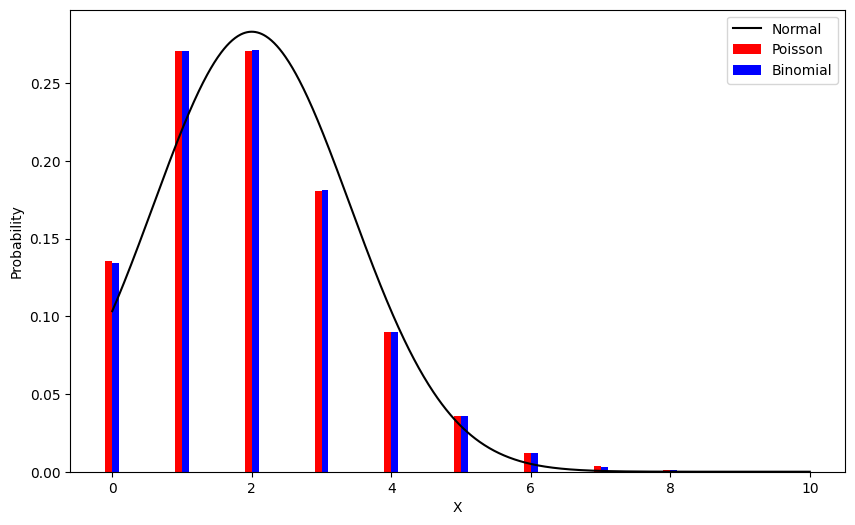

In [39]:
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import binom
import matplotlib.pyplot as plt

n = 250
p = 0.008

jointX = np.linspace(0, 10, 1000)
discreteX = np.arange(0, 10)

pdfNormal = norm.pdf(jointX, loc=n * p, scale=np.sqrt(n * p * (1 - p)))
pmfPoisson = poisson.pmf(discreteX, mu=n * p)
pmfBinomial = binom.pmf(discreteX, n=n, p=p)

plt.figure(figsize=(10, 6))

plt.plot(jointX, pdfNormal, color='black', label='Normal')
plt.bar(discreteX - 0.05, pmfPoisson, width=0.1, color='red', label='Poisson')
plt.bar(discreteX + 0.05, pmfBinomial, width=0.1, color='blue', label='Binomial')

plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()

plt.show()

# Q3 - Part 1

In [51]:
from scipy.stats import norm
import numpy as np
from scipy.integrate import quad

def normalPdf(x):
  return norm.pdf(x, loc=80, scale=12)

def normalCdf(x):
  result, _ = quad(normalPdf, 0, x)
  return result

def cdfInverse(prob):
  lowerGuess = 0
  upperGuess = 120
  Guess = (lowerGuess + upperGuess) / 2
  while True:
    Guess = (lowerGuess + upperGuess) / 2
    result = normalCdf(Guess)

    if np.abs(result - prob) < 1e-5:
      break
    if result >= prob:
      upperGuess = Guess
    else:
      lowerGuess = Guess

  return Guess


print(f'\n 1. {cdfInverse(0.9)} \n')
print(f'\n 2. {cdfInverse(0.5)} to {cdfInverse(0.75)} \n')
print(f'\n 3. {normalCdf(90)-normalCdf(80)} \n')


 1. 95.37872314453125 


 2. 80.00015258789062 to 88.0938720703125 


 3. 0.29767161903635697 



# Q3 - Bonus

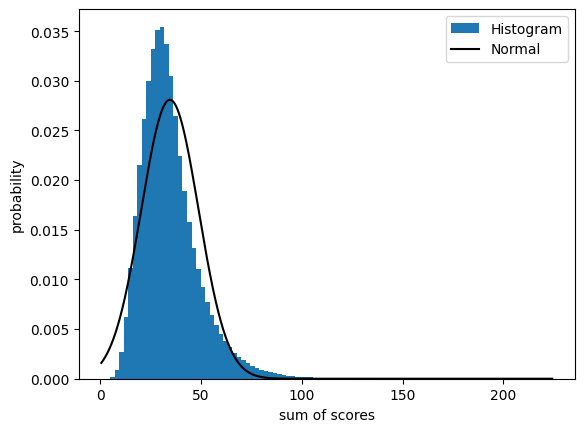

In [131]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

sampleCount = 10000000

uniform = 20 * np.random.uniform(size=sampleCount)
expon = np.random.exponential(scale=1/0.08 , size=sampleCount)
poisson = np.random.poisson(lam= 12 , size=sampleCount)

total = expon + poisson +  uniform

x = np.linspace(min(total), max(total), 10000)
normalPdf = norm.pdf(x, loc=np.mean(total), scale=np.std(total))

plt.hist(total, bins=100, density=True, label='Histogram')
plt.plot(x, normalPdf, color='black', label='Normal')

plt.xlabel('sum of scores')
plt.ylabel('probability')
plt.legend()
plt.show()

# Q3 - Part 2

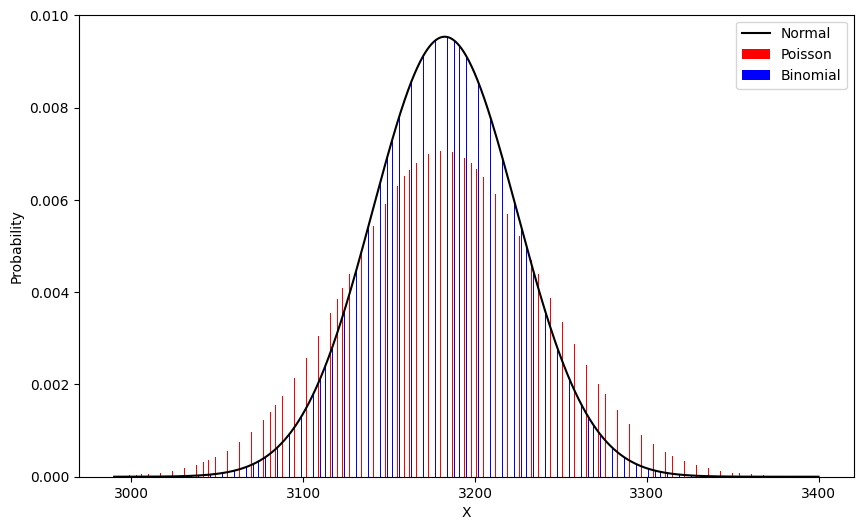

In [52]:
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import binom
import matplotlib.pyplot as plt

n = 7072
p = 0.45

jointX = np.linspace(2990, 3400, 1000)
discreteX = np.arange(2990, 3400)

pdfNormal = norm.pdf(jointX, loc=n * p, scale=np.sqrt(n * p * (1 - p)))
pmfPoisson = poisson.pmf(discreteX, mu=n * p)
pmfBinomial = binom.pmf(discreteX, n=n, p=p)

plt.figure(figsize=(10, 6))

plt.plot(jointX, pdfNormal, color='black', label='Normal')
plt.bar(discreteX - 0.05, pmfPoisson, width=0.1, color='red', label='Poisson')
plt.bar(discreteX + 0.05, pmfBinomial, width=0.1, color='blue', label='Binomial')

plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()

plt.show()